# Project 1: Understanding and Training Regression Models
## Regardless of the level you are in this course, you are NOT allowed to use import tools from the scipy or sci-kit learn.  The only imports allowed on this project are pandas, numpy, and matplotlib.

### Name:
### Course Level:

**Introduction:**
* In this project, we explore the application of regression in analyzing and modeling relationships between input variables. The project will be broken into sections in which students registered for CSC 448  and CSC 548 will complete Problems A - C, and CSC 548 students will complete all sections.

**Objectives:**
* The objective of this project is to implement different regression models to analyze real-world datasets, understand the relationship between variables, and make predictions.  Additionally, students will gain experience understanding optimization techniques (gradient descent, stochastic gradient descent, and so-called ``normal equations" to learn model parameter selection).

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## All Students

* The first problem we aim to analyze is a model similar to our class model of predicting how an audience might feel about a movie rating given the critic's score of the movie.  To get started, download the MovieData.csv file from the D2L project page.  This file contains an ordered pair $\mathcal{D} = \{(x^{(i)},t^{(i)})  \}$ for $i = 1,2,\dots,N$ samples.  Each pair represents a training example for the problem of interest.

**Problem A**

1. Let's plot the data to get an idea of what we're dealing with (be sure to label all axis ``critic vs. audience", and give the plot a title of your choosing).

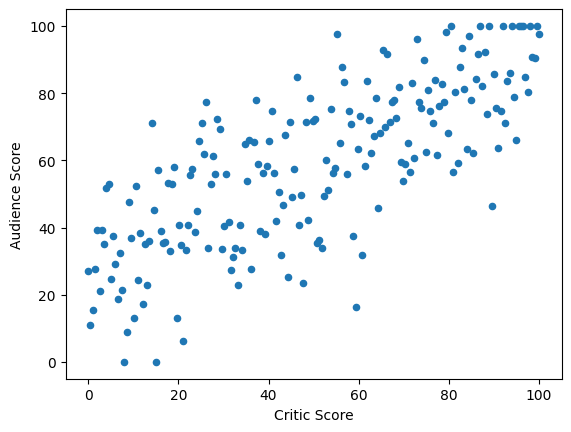

In [83]:
# Read in the data (however you prefer), and plot the results using a scatter plot (don't forget your axis labels: Critic Score vs. Audience Score) #
df = pd.read_csv('MovieData.csv')
df.plot(kind = 'scatter', x = 'Critic Score', y = 'Audience Score')
plt.show()

2. Next, write a function to compute the mean square error between two inputs (t_target,y_predicted)

In [84]:
# Function definition here, returns the mean square error between two inputs #
def MSE(t_target, y_predicted):
    n = len(y_predicted)
    mse = 0
    for i in range(n):
        mse += (t_target[i] - y_predicted[i])**2
    mse = mse / n

    return mse

3. Next write a function (called GradDescent)to learn the model parameters using gradient descent. 
    - The function will take as input, the target values, input values, and learning rate.
    - The function will return the model parameters.

**Note**  
* You should assume the model takes the form (to generalize when we have more than a single input, e.g., the next problem will require fitting a more complex model to the data instead of a simple line)
$$
    y = w_0 + \sum_{j=1}^M w_j x_j
$$

In [85]:
# Function to compute linear regression using gradient descent #
def GradDescent(t_target, x_input, l_learning_rate):
    i = 0
    w0 = 0.0
    w1 = 0.0
    prevMSE = float('inf')

    for i in range(10000):
        grad_w0 = 0.0
        grad_w1 = 0.0

        for j in range(len(x_input)):
            prediction = w0 + w1 * x_input[j]
            error = prediction - t_target[j]
            grad_w0 += error
            grad_w1 += error * x_input[j]
        w0 -= (1 / len( x_input)) * grad_w0 * l_learning_rate
        w1 -= (1 / len( x_input)) * grad_w1 * l_learning_rate
        
        pred = w0 + w1 * np.array(x_input)
        currMSE = MSE(t_target, pred)

        if ( abs(prevMSE - currMSE ) < 0.00001):
            break
        prevMSE = currMSE
    return np.array( [w0, w1] )

4. Next, we learned in class that for linear models, we could use an analytic solution of the form:
$$
    \textbf{w} = (X^T X)^{-1} X^T \textbf{t}
$$
where $X$ and $\textbf{t}$ are constructed as shown in class.  Write a function similar to the funciton in A.3 called LinRegression with input parameters $X$ and $\textbf{t}$ that returns the model weights.

In [86]:
# Function to compute the linear model weights using the analytic solution (could also explore np.lstsq) #
def LinRegression(X,t):
    X_t = np.transpose(X)

    X_t_X = np.matmul(X_t, X)
    X_t_Xi = np.linalg.inv(X_t_X)

    X_tt = np.matmul(X_t, t)
    ws = np.matmul(X_t_Xi, X_tt)

    return ws

5. Using both function in problem A.3 and A.4, verify that the model parameters do indeed converge to the same values regardless of which method you use by plotting the original data, with two different lines on top: one for the gradient descent, and one for the analytic solution.
    - Be sure to label all your plots and include a legend to distinguish between the scatter plot of original samples, and both line plots for your estimated model.

Gradient weights: [0.01120903 0.8583652 ]


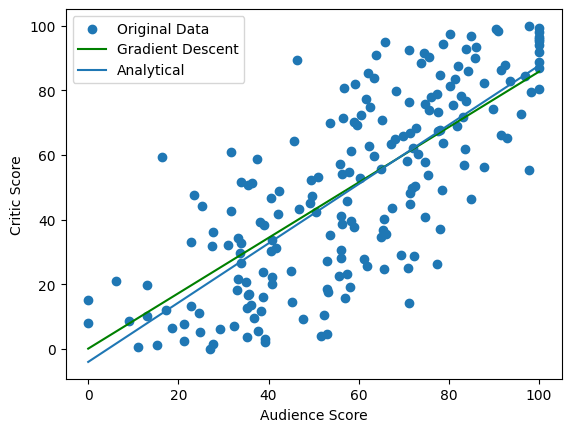

In [87]:
# Plot the original data (scatter) with two different lines for each of your models computed above #
df = pd.read_csv('MovieData.csv')
critic_scores = df['Critic Score'].to_numpy()
audience_scores = df['Audience Score'].to_numpy()

x = np.column_stack((np.ones(len(audience_scores)), audience_scores))

grad_w = GradDescent(critic_scores, audience_scores, 0.00001)
print("Gradient weights:", grad_w)
analy_w = LinRegression( x, critic_scores )

x_axis = np.linspace(0, 100, 500)

plt.scatter(audience_scores, critic_scores, label='Original Data')

plt.plot(x_axis, grad_w[0] + grad_w[1] * x_axis, label = 'Gradient Descent', color = 'green')

plt.plot(x_axis, analy_w[0] + analy_w[1] * x_axis, label='Analytical')

plt.xlabel("Audience Score")
plt.ylabel("Critic Score")
plt.legend()
plt.show()

6. To ensure the method for learning the model parameters is able to generalize well, use a 5-fold cross validation and 80/20 split of the data to build your model.  Using the MSE function above, compute the MSE for the validation set over all five folds and present the mean and deviation of the MSE.  You can use either method you choose for model validation, but I'd recommend using the analytic solution here.

In [88]:
# Evaluate your linear model using 5-fold cross validation #


indices = np.arange(len(df))
np.random.shuffle(indices)


folds = np.array_split(indices, 5)

mse_analy = []
mse_grad = []


for i in range(5):


    test_i = folds[i]


    train_i = np.concatenate([folds[j] for j in range(5) if j != i])

    audienceTrain = audience_scores[train_i]
    audienceTest  = audience_scores[test_i]

    criticTrain = critic_scores[train_i]
    criticTest  = critic_scores[test_i]

    # Run training and testing data for analytical and gradient descent
    train_inputs = np.column_stack((np.ones(len(audienceTrain)), audienceTrain))
    test_inputs = np.column_stack((np.ones(len(audienceTest)), audienceTest))

    w_analy = LinRegression( train_inputs, criticTrain )
    y_pred_analy = test_inputs @ w_analy
    mse_analy.append(MSE( criticTest, y_pred_analy))

    w_grad = GradDescent( criticTrain, audienceTrain, 0.00001 )
    y_pred_grad = w_grad[0] + w_grad[1] * audienceTest
    mse_grad.append(MSE(criticTest, y_pred_grad))

# compute mean and deviation of mse across folds
print("Analytical Solution MSE: mean = {:.2f}, std = {:.2f}".format(
    np.mean(mse_analy), np.std(mse_analy)))
print("Gradient Descent MSE: mean = {:.2f}, std = {:.2f}".format(
    np.mean(mse_grad), np.std(mse_grad)))



Analytical Solution MSE: mean = 360.84, std = 59.47
Gradient Descent MSE: mean = 360.00, std = 54.89


**Problem B**
1. Let's up the complexity a bit.  Download the second .csv file called HousingData.  This data contains housing prices (x1000) as a function of both size and year built.  Plot the data to get an idea of what we're dealing with (again, don't forget your axis labels)

# Rapid City Housing Dataset - Data Dictionary

**Dataset:** RapidCityHousing.csv  
**Purpose:** Synthetic dataset for machine learning education (regression analysis)  
**Observations:** 500 unique housing listings  
**Features:** 10 predictor variables + 1 target variable  

---

## Feature Descriptions

### Predictor Variables

1. **Size_SqFt** (integer)
   - House size in square feet
   - Range: 800 - 4,000 sq ft
   - Mean: ~1,806 sq ft
   - Primary driver of price

2. **Year_Built** (integer)
   - Year the house was constructed
   - Range: 1950 - 2024
   - Mean: ~1986
   - Non-linear relationship with price (depreciation curve)

3. **Bedrooms** (integer)
   - Number of bedrooms
   - Range: 2 - 6
   - Correlated with house size

4. **Bathrooms** (float)
   - Number of bathrooms (includes half-baths)
   - Range: 1.0 - 4.5
   - Increments of 0.5
   - Correlated with size and bedrooms

5. **Lot_Size_Acres** (float)
   - Property lot size in acres
   - Range: 0.1 - 2.0 acres
   - Slight correlation with house size

6. **Garage_Spaces** (integer)
   - Number of car garage spaces
   - Range: 0 - 3
   - Most common: 2-car garage

7. **Distance_Downtown_Miles** (float)
   - Distance from downtown Rapid City in miles
   - Range: 0.5 - 15 miles
   - Slight negative correlation with price

8. **Neighborhood_Quality** (integer)
   - Subjective neighborhood quality score
   - Range: 4 - 10 (scale of 1-10)
   - Based on schools, amenities, crime rates, etc.

9. **Days_On_Market** (integer)
   - Number of days the listing has been active
   - Range: 1 - 365 days
   - Mean: ~45 days
   - Slight negative correlation with price

10. **Has_Basement** (binary: 0/1)
    - Whether the house has a basement
    - 0 = No basement
    - 1 = Has basement
    - ~70% of homes have basements

### Target Variable

11. **Price_Thousands** (float)
    - Home sale price in thousands of dollars
    - Range: $273k - $650k
    - Mean: ~$433k
    - To get actual price: multiply by 1,000

---

## Data Generation Methodology

This is a **synthetic dataset** created for educational purposes with the following characteristics:

### Realistic Relationships
- **Primary driver:** Square footage has the strongest correlation with price (r = 0.936)
- **Non-linear effects:** Age shows a depreciation curve, not linear decline
- **Feature interactions:** Bedrooms/bathrooms correlated with size
- **Market dynamics:** Days on market shows exponential distribution (most sell quickly)

### Price Model
The price was generated using a multi-factor model:
```
Price = f(size, size², age, age², bedrooms, bathrooms, lot_size, 
          garage, distance, neighborhood, basement, market_time) + noise
```

### Why Synthetic?
- Avoids legal/ethical issues with scraping real estate sites
- Allows controlled feature relationships for teaching
- Ensures data quality and completeness
- Can be freely shared and modified

---


In [ ]:
# 3D scatter plot of the data to see what the data looks like #
house_df = pd.read_csv("RapidCityHousing.csv")
df.plot(kind = 'scatter', x = 'size_SqFt', y = 'Bedrooms', z = 'Price Thousands')
plt.show()

2. Assuming a linear model of the form $y = w_0 + w_1 x_1 + w_2 x_2$, use both methods described above to learn the model paramters for the model.

In [ ]:
# model parameters learned here #
# learn model parameters for the complex function above #


3. To investigate the model fit, let's plot the model surface along with the original data.

In [ ]:
# Plot model surface here #


# Predict values for meshgrid


# Plotting


**Problem C**
* In Problem B, you assumed a linear model to fit the data, however, after further analysis of the data, you realized that a linear fit doesn't do a great job for this particular dataset.  Let's up the model complexity a bit to see if we can reduce the overall error in our model.
    - As a "guess", let's assume the model is given by $y = w_0 + w_1 \sqrt{(x_1 - 100)} + w_2 (x_2 - 1960)^2$
    - Using this model, learn the model parameters to minimize the MSE (hint: you can use the analytic solution with proper choice of $X$)
    - Plot the new model, along with the original data (as a surface plot) to illustrate the fit.
    - Compare the MSE you get using the more complex model with the linear model you assumed in Problem B.

In [ ]:
# learn model parameters for the complex function above #
# learn model parameters for the complex function above #


# Because this is a partner lab, you MUST list below who did what on the project to ensure equal contribution:

### Partner A (Name):
1. blah
2. blah
3. blah

### Partner B (name):
1. blah
2. blah
3. blah

---
# CSC/DSE 548 Only! - Graduate students should work Problem D without the help of their partner!
---

**Problem D**
* In class we presented without proof that minimizing the MSE using gradient descent can be computed analytically for generalized linear models (GLMs).  Prove that this claim is indeed true.

**Hint:** The following relationships may come in handy.
 $$
   \sum_{i=1}^N \left( z^{(i)}  \right)^2 = \| \textbf{z} \|^2_2 = \textbf{z}^T \textbf{z}
$$
$$
   \frac{\partial \textbf{z}^T \textbf{u}}{\partial \textbf{z}} = \textbf{u}
$$
$$
   \frac{\partial \textbf{z}^T A \textbf{z}}{\partial \textbf{z}} = (A + A^T) \textbf{z}
$$

<ins>*Claim:*</ins> Given the linear model:
     $$y(x) = w_0 + w_1 x$$ 
     with cost 
     $$
        \ell(\textbf{w}) = \frac{1}{2N} \sum_{n=1}^N \left[ t^{(n)} - y(x^{(n)}) \right]^2,
    $$
    we can compute the model parameters analytically as:
    $$
        \textbf{w} = \left( X^T X \right)^{-1} X^T \textbf{t},
    $$

<ins>*Proof:*</ins>